In [ ]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from kan_sklearn import KANClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [ ]:
df = 'pdfFeatureFile_cleaned.csv'
df = pd.read_csv(df)
df

,avg_children,avg_clustering_coefficient,avg_degree,avg_shortest_path,degree_assortativity,density,depth,median_children,num_edges,num_leaves,num_nodes,var_children,label,source_GOV
0,0.017640,0.011440,0.027027,0.106743,0.437150,0.051283,0.50,0.000000,0.003810,0.054527,0.028285,0.003303,0.0,1.0
1,0.044718,0.022904,0.054054,0.139215,0.515313,0.033944,0.50,0.000000,0.010920,0.108054,0.057684,0.007773,0.0,1.0
2,0.079062,0.045501,0.081081,0.188432,0.548499,0.073215,0.50,0.000000,0.010556,0.060030,0.040312,0.002818,0.0,1.0
3,0.060185,0.019385,0.054054,0.128743,0.434720,0.032730,0.75,0.000000,0.015312,0.130565,0.069488,0.012124,0.0,1.0
4,0.181635,0.931986,0.189189,0.100416,0.378073,0.124913,0.50,0.000000,0.021088,0.082041,0.044543,0.021375,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0.005502,0.000000,0.027027,0.065868,0.338906,0.651646,0.50,0.083333,0.000049,0.000500,0.000445,0.000000,1.0,0.0
1997,0.041553,0.078455,0.054054,0.112096,0.567147,0.381777,0.50,0.000000,0.000946,0.005503,0.004454,0.000173,1.0,0.0
1998,0.047426,0.049358,0.054054,0.107661,0.589310,0.573069,0.50,0.083333,0.000679,0.003002,0.002673,0.000171,1.0,0.0
1999,0.039227,0.031292,0.054054,0.068115,0.540956,0.346466,0.50,0.083333,0.000995,0.005003,0.004900,0.000209,1.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# extracting input and output data from the training dataset
X = df.iloc[:, 1: 12]
y = df.iloc[:, -1]

# fitting the MinMaxScaler on the features
scaler = StandardScaler().fit(X)

# scaling the features to [0, 1]
X_scaled = scaler.transform(X)
X_scaled


array([[-0.56566783, -0.7152995 , -0.26639642, ...,  0.09465406,
        -0.10215705, -0.08360823],
       [-0.40999536, -0.26562489,  0.13281068, ...,  1.02072317,
         0.42608134,  0.0685742 ],
       [-0.10312456,  0.18404973,  0.73786514, ...,  0.18985742,
         0.11394047, -0.1001385 ],
       ...,
       [-0.05074992, -0.26562489, -0.25510937, ..., -0.79679564,
        -0.56236473, -0.19025021],
       [-0.29607506, -0.26562489, -0.74127981, ..., -0.76217624,
        -0.52234667, -0.18893303],
       [ 0.41328881, -0.26562489, -0.35042627, ..., -0.79679564,
        -0.56236473, -0.19120461]])

In [ ]:
#splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=12, stratify=y)
X_train

array([[ 2.99753555,  1.08339896,  2.14279358, ..., -0.36405307,
        -0.05413537, -0.14434398],
       [-0.44678941, -0.26562489, -0.35358651, ...,  1.09861683,
         0.45409398,  0.08399389],
       [ 0.41328881, -0.26562489, -0.35042627, ..., -0.79679564,
        -0.56236473, -0.19120461],
       ...,
       [ 0.67234724,  1.08339896,  1.42986999, ..., -0.8054505 ,
        -0.51834486, -0.18795058],
       [-0.05074992, -0.26562489, -0.25510937, ..., -0.79679564,
        -0.56236473, -0.19025021],
       [ 0.41328881, -0.26562489, -0.35042627, ..., -0.79679564,
        -0.56236473, -0.19120461]])

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# y_train = y_train.astype(np.float64)
# y_test = y_test.astype(np.float64)

print(X_train.dtype)  # For NumPy arrays
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)


(1600, 11)
(1600,)
(401, 11)
(401,)
float64
float64
float64
float64


In [ ]:
#initializing a KANClassifier using GPU acceleration (CUDA device).
#KANClassifier() has default value of each parameter.
#There are parameters with their default values:
# regularize_activation=1.0
# regularize_entropy=1.0
# regularize_ridge=0.0
# grid_size=5,
# spline_order=3,
# scale_noise=0.1,
# scale_base=1.0,
# scale_spline=1.0,
# base_activation=torch.nn.SiLU,
# grid_eps=0.02,
# grid_range=[-1, 1],
# model = KANClassifier(device='cuda')
model = KANClassifier(device='cpu')

#training the model on training dataset (X_train, y_train)
mode,train_losses,validation_lossesl=model.fit(X_train, y_train)
#predicting output for the X_test dataset
y_pred = model.predict(X_test)

#accuracy on test dataset
accuracy_test = accuracy_score(y_test, y_pred)
print("\nAccuracy on Test Set:", accuracy_test)
#classification report for the test set
print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred))
#Cohen's Kappa score for the test set
kappa_test = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score on Test Set:", kappa_test)
#confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test Set:")
print(conf_matrix_test)


100%|██████████| 100/100 [00:09<00:00, 10.33it/s]



Accuracy on Test Set: 0.9551122194513716
Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       201
         1.0       0.97      0.94      0.95       200

    accuracy                           0.96       401
   macro avg       0.96      0.96      0.96       401
weighted avg       0.96      0.96      0.96       401

Cohen's Kappa Score on Test Set: 0.910217180386596
Confusion Matrix for Test Set:
[[195   6]
 [ 12 188]]


Performace Metrics:

* Cohen's Kappa: it measures the agreement between predicted and actual classifications, adjusted for chance.
* Classification Report: it provides detailed performance metrics such as precision, recall, and F1-score for each class.
* Confusion Matrix: it shows the true positives, false positives, true negatives, and false negatives, providing insights into the classification performance.

In [ ]:
#defining hyperparameter ranges
#adjusting hidden layer sizes
hidden_layers = [32, 64]
#different activation regularization values
activations = [0.1, 0.3]
#different entropy regularization values
entropies = [0.1, 0.3]
#different ridge regularization values
ridges = [0.1, 0.3]
#iterating through combinations of hyperparameters including the new dropout rate
for hidden_layer_size in hidden_layers:
    for regularize_activation in activations:
        for regularize_entropy in entropies:
            for regularize_ridge in ridges:
                    kan_model = KANClassifier(hidden_layer_size=hidden_layer_size, device='cpu',
                                          regularize_activation=regularize_activation,
                                          regularize_entropy=regularize_entropy,
                                          regularize_ridge=regularize_ridge)

                    #training the model
                    kan_model.fit(X_train, y_train)
                    #predicting data points using 'kan_model'
                    y_pred = kan_model.predict(X_test)
                    #printing hyperparameter values
                    print(hidden_layer_size, regularize_activation, regularize_entropy, regularize_ridge)
                    #accuracy on test dataset
                    accuracy_test = accuracy_score(y_test, y_pred)
                    print("Accuracy on Test Set:", accuracy_test)

                    #Cohen's Kappa score for the test set
                    kappa_test = cohen_kappa_score(y_test, y_pred)
                    print("Cohen's Kappa Score on Test Set:", kappa_test)

                    #classification report for the test set
                    #print("Classification Report for Test Set:")
                    print(classification_report(y_test, y_pred))

                    #confusion matrix for the test set
                    conf_matrix_test = confusion_matrix(y_test, y_pred)
                    print("Confusion Matrix for Test Set:\n", conf_matrix_test)


100%|██████████| 100/100 [00:07<00:00, 14.23it/s]


32 0.1 0.1 0.1
Accuracy on Test Set: 0.9526184538653366
Cohen's Kappa Score on Test Set: 0.9052304247776604
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       201
         1.0       0.96      0.94      0.95       200

    accuracy                           0.95       401
   macro avg       0.95      0.95      0.95       401
weighted avg       0.95      0.95      0.95       401

Confusion Matrix for Test Set:
 [[194   7]
 [ 12 188]]


100%|██████████| 100/100 [00:06<00:00, 14.53it/s]


32 0.1 0.1 0.3
Accuracy on Test Set: 0.9451371571072319
Cohen's Kappa Score on Test Set: 0.890262712707732
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       201
         1.0       0.96      0.93      0.94       200

    accuracy                           0.95       401
   macro avg       0.95      0.95      0.95       401
weighted avg       0.95      0.95      0.95       401

Confusion Matrix for Test Set:
 [[194   7]
 [ 15 185]]


100%|██████████| 100/100 [00:07<00:00, 13.33it/s]


32 0.1 0.3 0.1
Accuracy on Test Set: 0.827930174563591
Cohen's Kappa Score on Test Set: 0.6556483428955457
              precision    recall  f1-score   support

         0.0       0.76      0.95      0.85       201
         1.0       0.93      0.70      0.80       200

    accuracy                           0.83       401
   macro avg       0.85      0.83      0.83       401
weighted avg       0.85      0.83      0.83       401

Confusion Matrix for Test Set:
 [[191  10]
 [ 59 141]]


100%|██████████| 100/100 [00:06<00:00, 15.23it/s]


32 0.1 0.3 0.3
Accuracy on Test Set: 0.7381546134663342
Cohen's Kappa Score on Test Set: 0.4759213850960282
              precision    recall  f1-score   support

         0.0       0.68      0.89      0.77       201
         1.0       0.84      0.59      0.69       200

    accuracy                           0.74       401
   macro avg       0.76      0.74      0.73       401
weighted avg       0.76      0.74      0.73       401

Confusion Matrix for Test Set:
 [[178  23]
 [ 82 118]]


100%|██████████| 100/100 [00:07<00:00, 13.76it/s]


32 0.3 0.1 0.1
Accuracy on Test Set: 0.9177057356608479
Cohen's Kappa Score on Test Set: 0.8353961165773139
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       201
         1.0       0.93      0.90      0.92       200

    accuracy                           0.92       401
   macro avg       0.92      0.92      0.92       401
weighted avg       0.92      0.92      0.92       401

Confusion Matrix for Test Set:
 [[188  13]
 [ 20 180]]


100%|██████████| 100/100 [00:06<00:00, 14.94it/s]


32 0.3 0.1 0.3
Accuracy on Test Set: 0.940149625935162
Cohen's Kappa Score on Test Set: 0.8802717026199895
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       201
         1.0       0.98      0.90      0.94       200

    accuracy                           0.94       401
   macro avg       0.94      0.94      0.94       401
weighted avg       0.94      0.94      0.94       401

Confusion Matrix for Test Set:
 [[198   3]
 [ 21 179]]


 65%|██████▌   | 65/100 [00:05<00:02, 12.60it/s]


	Early stopping
32 0.3 0.3 0.1
Accuracy on Test Set: 0.9301745635910225
Cohen's Kappa Score on Test Set: 0.8603413105129608
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       201
         1.0       0.94      0.92      0.93       200

    accuracy                           0.93       401
   macro avg       0.93      0.93      0.93       401
weighted avg       0.93      0.93      0.93       401

Confusion Matrix for Test Set:
 [[189  12]
 [ 16 184]]


100%|██████████| 100/100 [00:06<00:00, 15.17it/s]


32 0.3 0.3 0.3
Accuracy on Test Set: 0.9625935162094763
Cohen's Kappa Score on Test Set: 0.9251837755140118
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       201
         1.0       0.97      0.95      0.96       200

    accuracy                           0.96       401
   macro avg       0.96      0.96      0.96       401
weighted avg       0.96      0.96      0.96       401

Confusion Matrix for Test Set:
 [[195   6]
 [  9 191]]


100%|██████████| 100/100 [00:10<00:00,  9.37it/s]


64 0.1 0.1 0.1
Accuracy on Test Set: 0.9625935162094763
Cohen's Kappa Score on Test Set: 0.9251837755140118
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       201
         1.0       0.97      0.95      0.96       200

    accuracy                           0.96       401
   macro avg       0.96      0.96      0.96       401
weighted avg       0.96      0.96      0.96       401

Confusion Matrix for Test Set:
 [[195   6]
 [  9 191]]


100%|██████████| 100/100 [00:10<00:00,  9.25it/s]


64 0.1 0.1 0.3
Accuracy on Test Set: 0.970074812967581
Cohen's Kappa Score on Test Set: 0.9401492537313433
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       201
         1.0       0.97      0.97      0.97       200

    accuracy                           0.97       401
   macro avg       0.97      0.97      0.97       401
weighted avg       0.97      0.97      0.97       401

Confusion Matrix for Test Set:
 [[195   6]
 [  6 194]]


100%|██████████| 100/100 [00:10<00:00,  9.81it/s]


64 0.1 0.3 0.1
Accuracy on Test Set: 0.9800498753117207
Cohen's Kappa Score on Test Set: 0.9601014874881847
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       201
         1.0       0.97      0.99      0.98       200

    accuracy                           0.98       401
   macro avg       0.98      0.98      0.98       401
weighted avg       0.98      0.98      0.98       401

Confusion Matrix for Test Set:
 [[195   6]
 [  2 198]]


100%|██████████| 100/100 [00:09<00:00, 10.47it/s]


64 0.1 0.3 0.3
Accuracy on Test Set: 0.9201995012468828
Cohen's Kappa Score on Test Set: 0.8403741852017714
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92       201
         1.0       0.95      0.89      0.92       200

    accuracy                           0.92       401
   macro avg       0.92      0.92      0.92       401
weighted avg       0.92      0.92      0.92       401

Confusion Matrix for Test Set:
 [[191  10]
 [ 22 178]]


100%|██████████| 100/100 [00:10<00:00,  9.84it/s]


64 0.3 0.1 0.1
Accuracy on Test Set: 0.9600997506234414
Cohen's Kappa Score on Test Set: 0.9201950345788348
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       201
         1.0       0.97      0.95      0.96       200

    accuracy                           0.96       401
   macro avg       0.96      0.96      0.96       401
weighted avg       0.96      0.96      0.96       401

Confusion Matrix for Test Set:
 [[195   6]
 [ 10 190]]


 57%|█████▋    | 57/100 [00:06<00:04,  8.76it/s]


	Early stopping
64 0.3 0.1 0.3
Accuracy on Test Set: 0.8653366583541147
Cohen's Kappa Score on Test Set: 0.7305174602384449
              precision    recall  f1-score   support

         0.0       0.80      0.98      0.88       201
         1.0       0.97      0.75      0.85       200

    accuracy                           0.87       401
   macro avg       0.89      0.87      0.86       401
weighted avg       0.89      0.87      0.86       401

Confusion Matrix for Test Set:
 [[197   4]
 [ 50 150]]


100%|██████████| 100/100 [00:09<00:00, 10.83it/s]


64 0.3 0.3 0.1
Accuracy on Test Set: 0.9526184538653366
Cohen's Kappa Score on Test Set: 0.9052374970460566
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       201
         1.0       0.95      0.95      0.95       200

    accuracy                           0.95       401
   macro avg       0.95      0.95      0.95       401
weighted avg       0.95      0.95      0.95       401

Confusion Matrix for Test Set:
 [[191  10]
 [  9 191]]


100%|██████████| 100/100 [00:10<00:00,  9.54it/s]

64 0.3 0.3 0.3
Accuracy on Test Set: 0.8603491271820449
Cohen's Kappa Score on Test Set: 0.7206895693922735
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86       201
         1.0       0.86      0.85      0.86       200

    accuracy                           0.86       401
   macro avg       0.86      0.86      0.86       401
weighted avg       0.86      0.86      0.86       401

Confusion Matrix for Test Set:
 [[174  27]
 [ 29 171]]


In [ ]:
#training KAN model using best hyperparamter set from the previous trials
hidden_layer_size=32
regularize_activation=.3
regularize_entropy=.1
regularize_ridge=.1
spline_order=3

kan_model = KANClassifier(device='cpu', hidden_layer_size=32, regularize_activation=.3,
                      regularize_entropy=.3, regularize_ridge=.1, spline_order=3)

#fitting the model on train set
kan_model, train_losses, validation_losses = kan_model.fit(X_train, y_train)

#predicting data points using 'kan_model'
y_pred = kan_model.predict(X_test)
#printing hyperparameter values
print(hidden_layer_size, regularize_activation, regularize_entropy, regularize_ridge)
#accuracy on test dataset
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy_test)

#Cohen's Kappa score for the test set
kappa_test = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score on Test Set:", kappa_test)

#classification report for the test set
#print("Classification Report for Test Set:")
print(classification_report(y_test, y_pred))

#confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Test Set:\n", conf_matrix_test)

100%|██████████| 100/100 [00:09<00:00, 11.04it/s]

32 0.3 0.1 0.1
Accuracy on Test Set: 0.9625935162094763
Cohen's Kappa Score on Test Set: 0.9251856366372716
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96       201
         1.0       0.96      0.96      0.96       200

    accuracy                           0.96       401
   macro avg       0.96      0.96      0.96       401
weighted avg       0.96      0.96      0.96       401

Confusion Matrix for Test Set:
 [[194   7]
 [  8 192]]


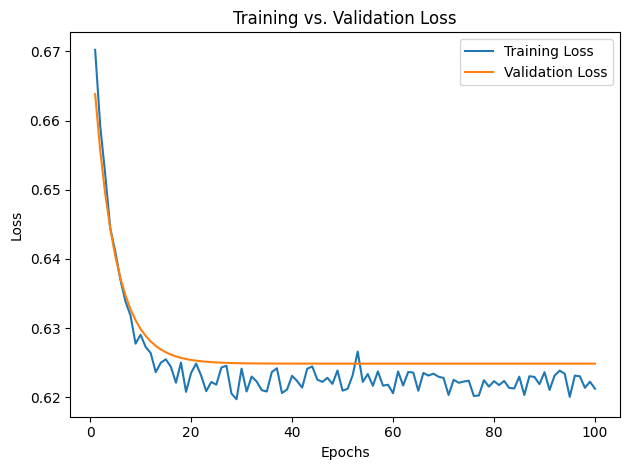

In [ ]:
# Plot the training loss curve
epochs = range(1, len(train_losses) + 1)

plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.tight_layout()
plt.show()

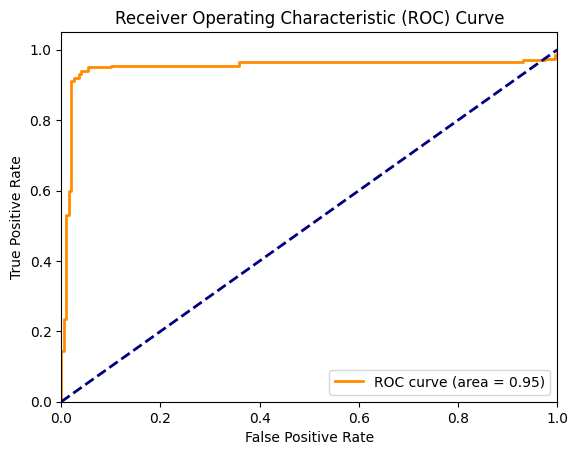

In [ ]:
#ploting ROC curve as well
#predicting probabilities for the test set
y_prob = kan_model.predict_proba(X_test)[:, 1]

#creating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#ploting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")


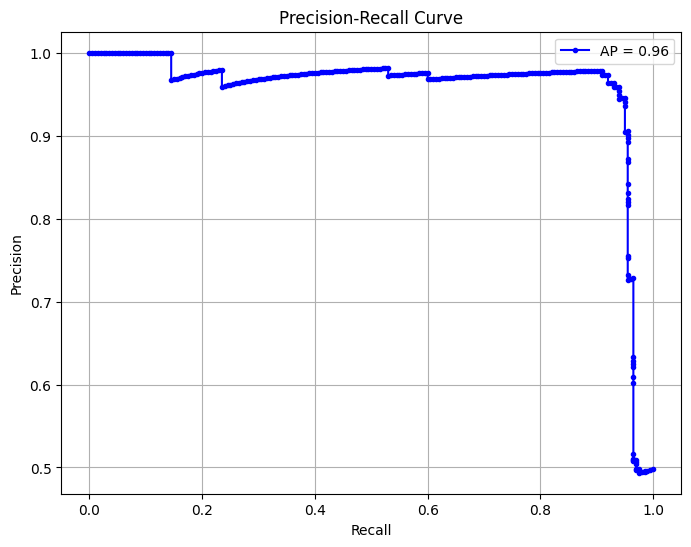

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Predict probabilities for the test set
y_prob = kan_model.predict_proba(X_test)[:, 1]

# Compute precision-recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# Plot PR Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AP = {avg_precision:.2f}', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


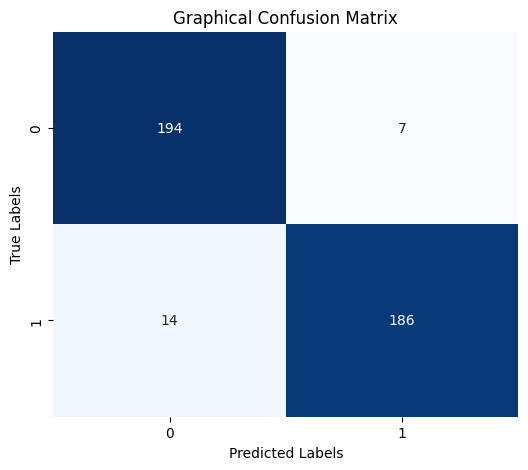

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Graphical Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef

# Predict on the test set
y_pred = kan_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Compute metrics
sensitivity = TP / (TP + FN)  # Recall / TPR
specificity = TN / (TN + FP)  # TNR
mcc = matthews_corrcoef(y_test, y_pred)  # MCC using sklearn

# Print results
print(f"Sensitivity (Recall / TPR): {sensitivity:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Sensitivity (Recall / TPR): 0.9300
Specificity (TNR): 0.9652
Matthews Correlation Coefficient (MCC): 0.8958


In [ ]:
!pip install lime


In [ ]:
from lime import lime_tabular

In [ ]:
# Create LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train,  # scaled training data
    feature_names=X.columns.tolist(),  # original feature names
    class_names=['Benign', 'Malicious'],
    mode='classification',
    discretize_continuous=True  # optional: can be True or False depending on the effect you want
)


In [ ]:

X_test[4]
kan_model.predict_proba(X_test)[6]


array([0.53975976, 0.46024022], dtype=float32)

In [ ]:
# Select an instance from the test set
i = 4
instance = X_test[i]

# Get explanation
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=kan_model.predict_proba,  # function that returns class probabilities
    num_features=11  # top features to show in explanation
)

# Show explanation in notebook
exp.show_in_notebook(show_table=True, show_all=True)


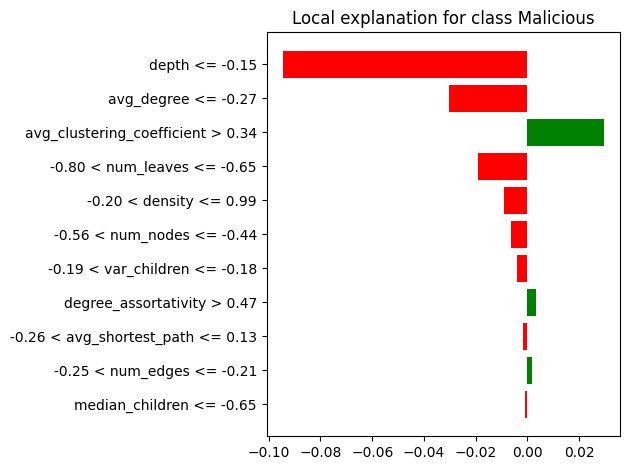

In [ ]:
# Save explanation as HTML
exp.save_to_file('lime_explanation.html')

# Or plot in notebook
fig = exp.as_pyplot_figure()
plt.tight_layout()
plt.show()
